# Cube Cleaning and Spectra Stacking
1) Clean spectra

2) Extract spectra

3) Barycentric correction

4) Stack spectra

5) Select best fitting degree

6) Best fit

### Imports

In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

from cube_cut import cut_cube
from run_barycentric import barycentric_correction
from spectra_stacker_gen2 import spectra_stack

warnings.filterwarnings('ignore')

### 1) Cleaning spectra

Cut cubes to clean data. 

1) Input file directory and keyword.

2) Choose values for x and y to make a cutout

['/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/NGC_247/GCs/kb231024_00050_icubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/NGC_247/GCs/kb231024_00051_icubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/NGC_247/GCs/kb231024_00052_icubes.fits']
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/NGC_247/GCs/kb231024_00050_icubes.fits 3328.0
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/NGC_247/GCs/kb231024_00051_icubes.fits 3328.0
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/NGC_247/GCs/kb231024_00052_icubes.fits 3328.0
304 2297
The beginning and ending wavelength cuts for the cube are 304.00 and 2297.00 respectively


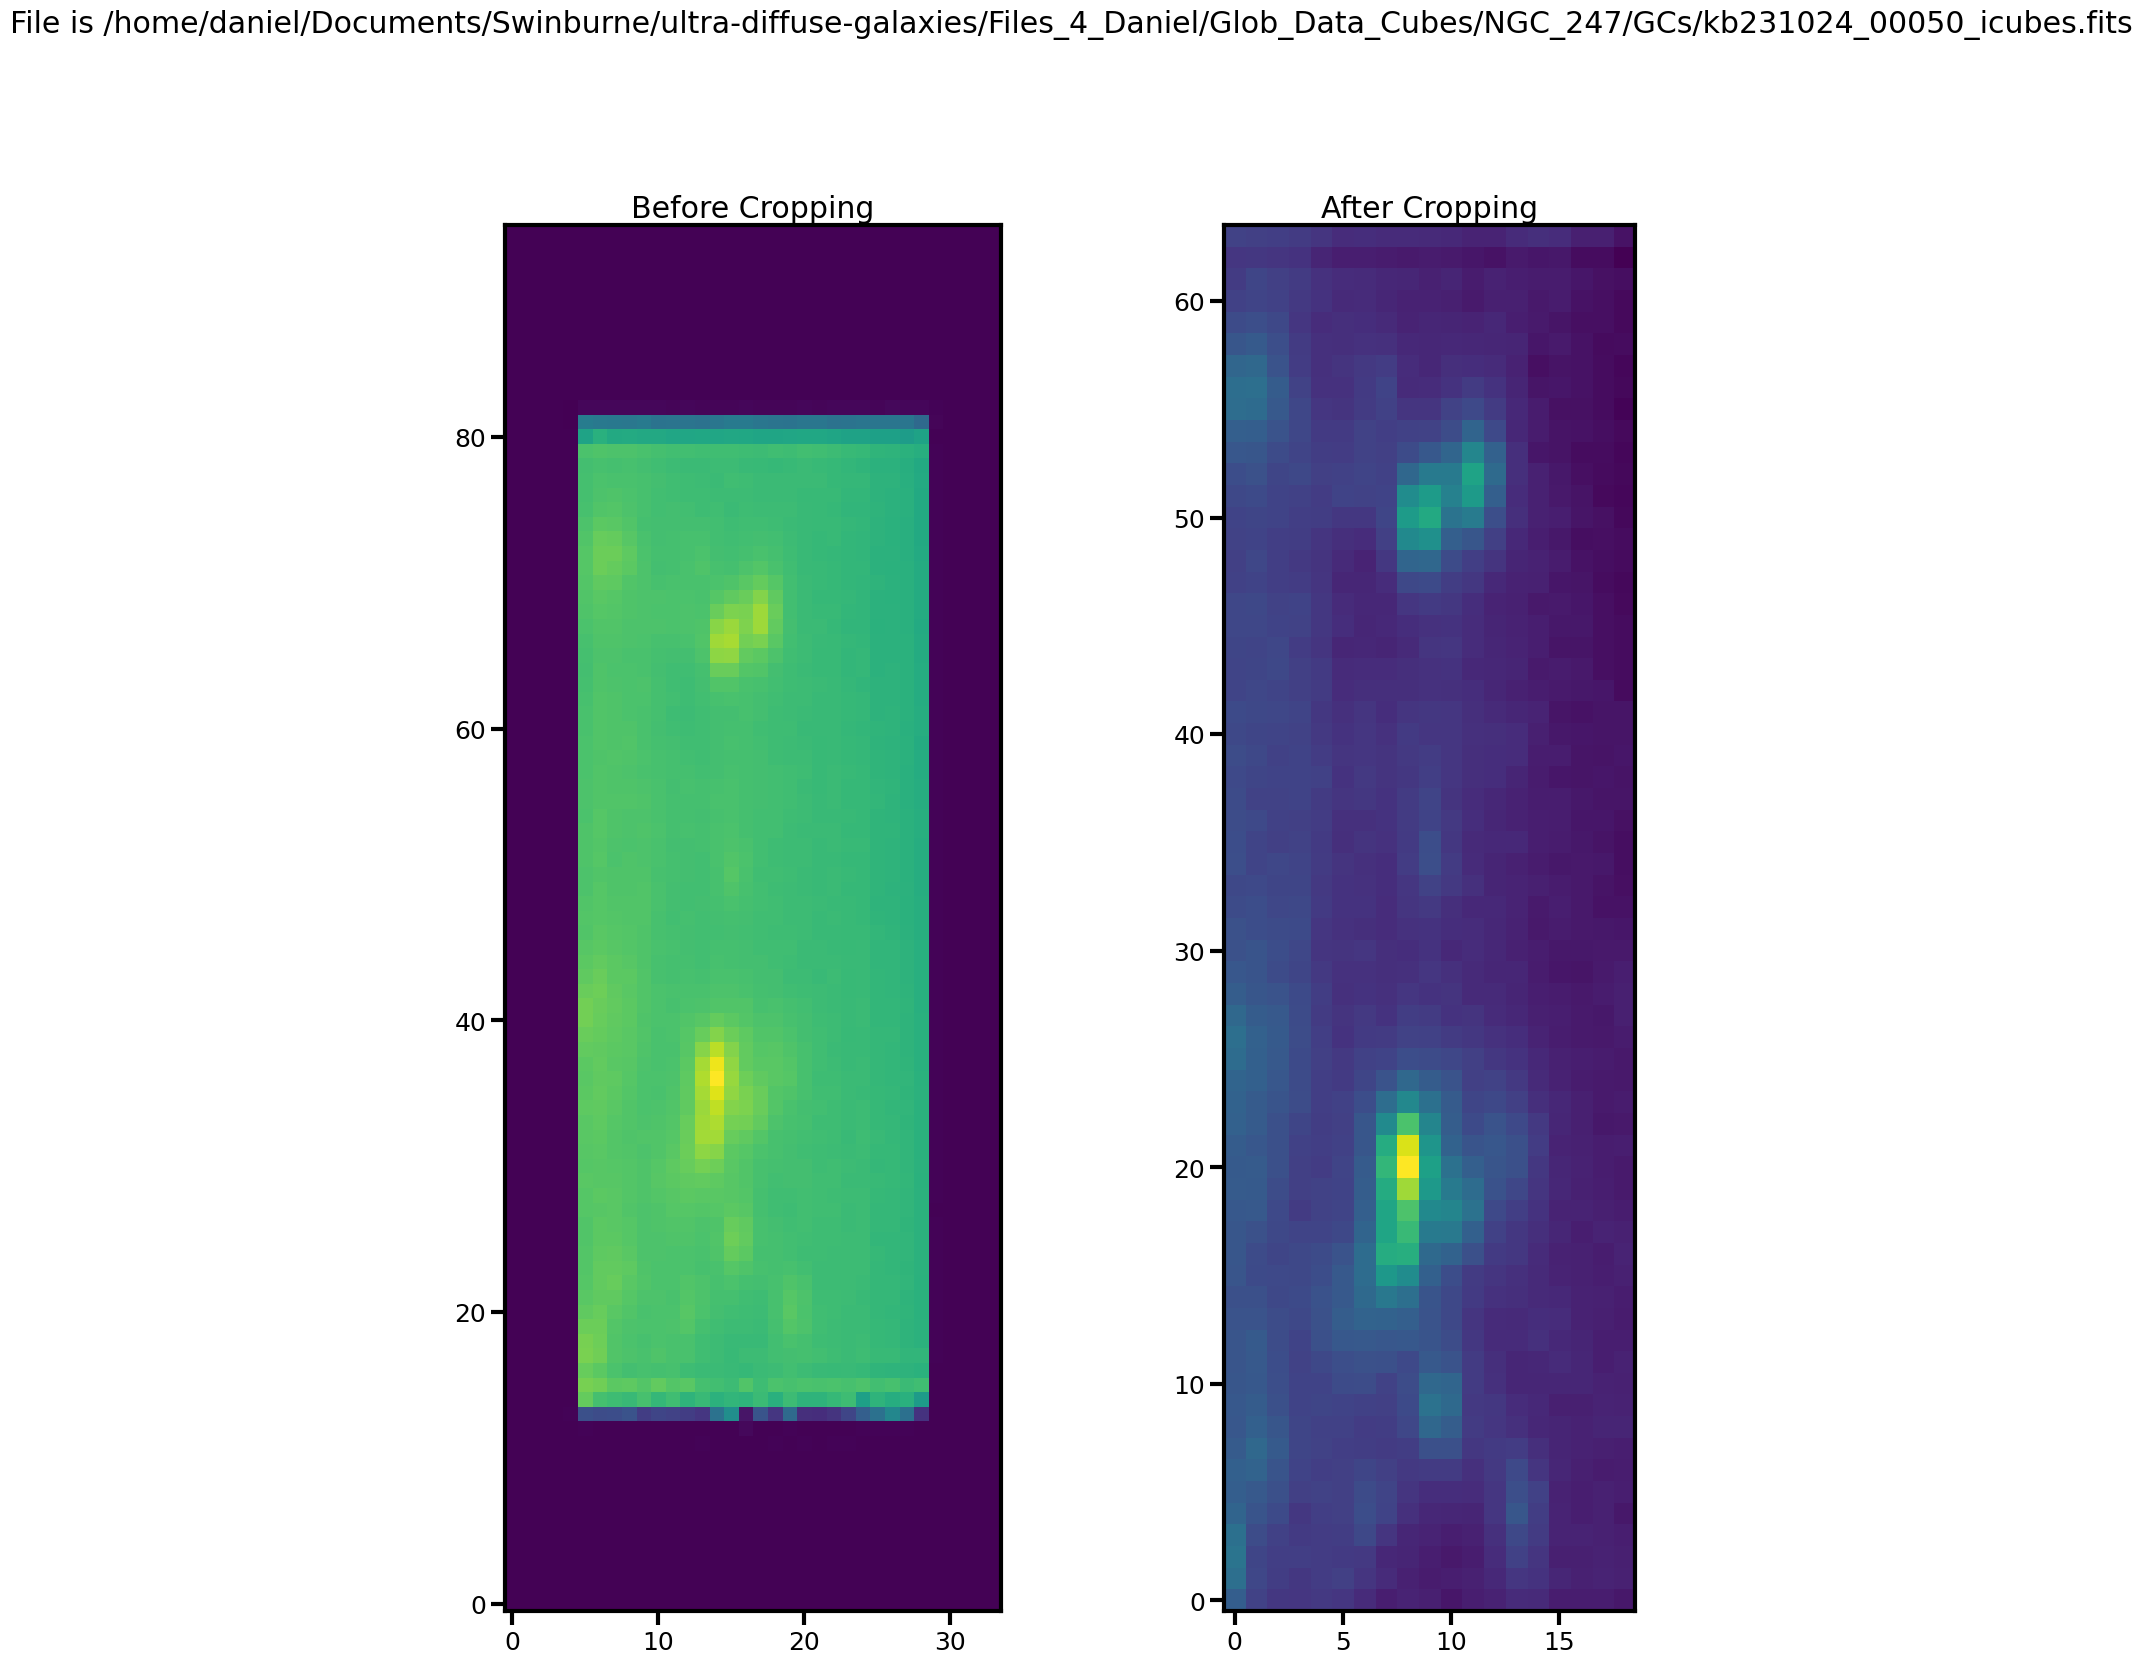

Files Written out


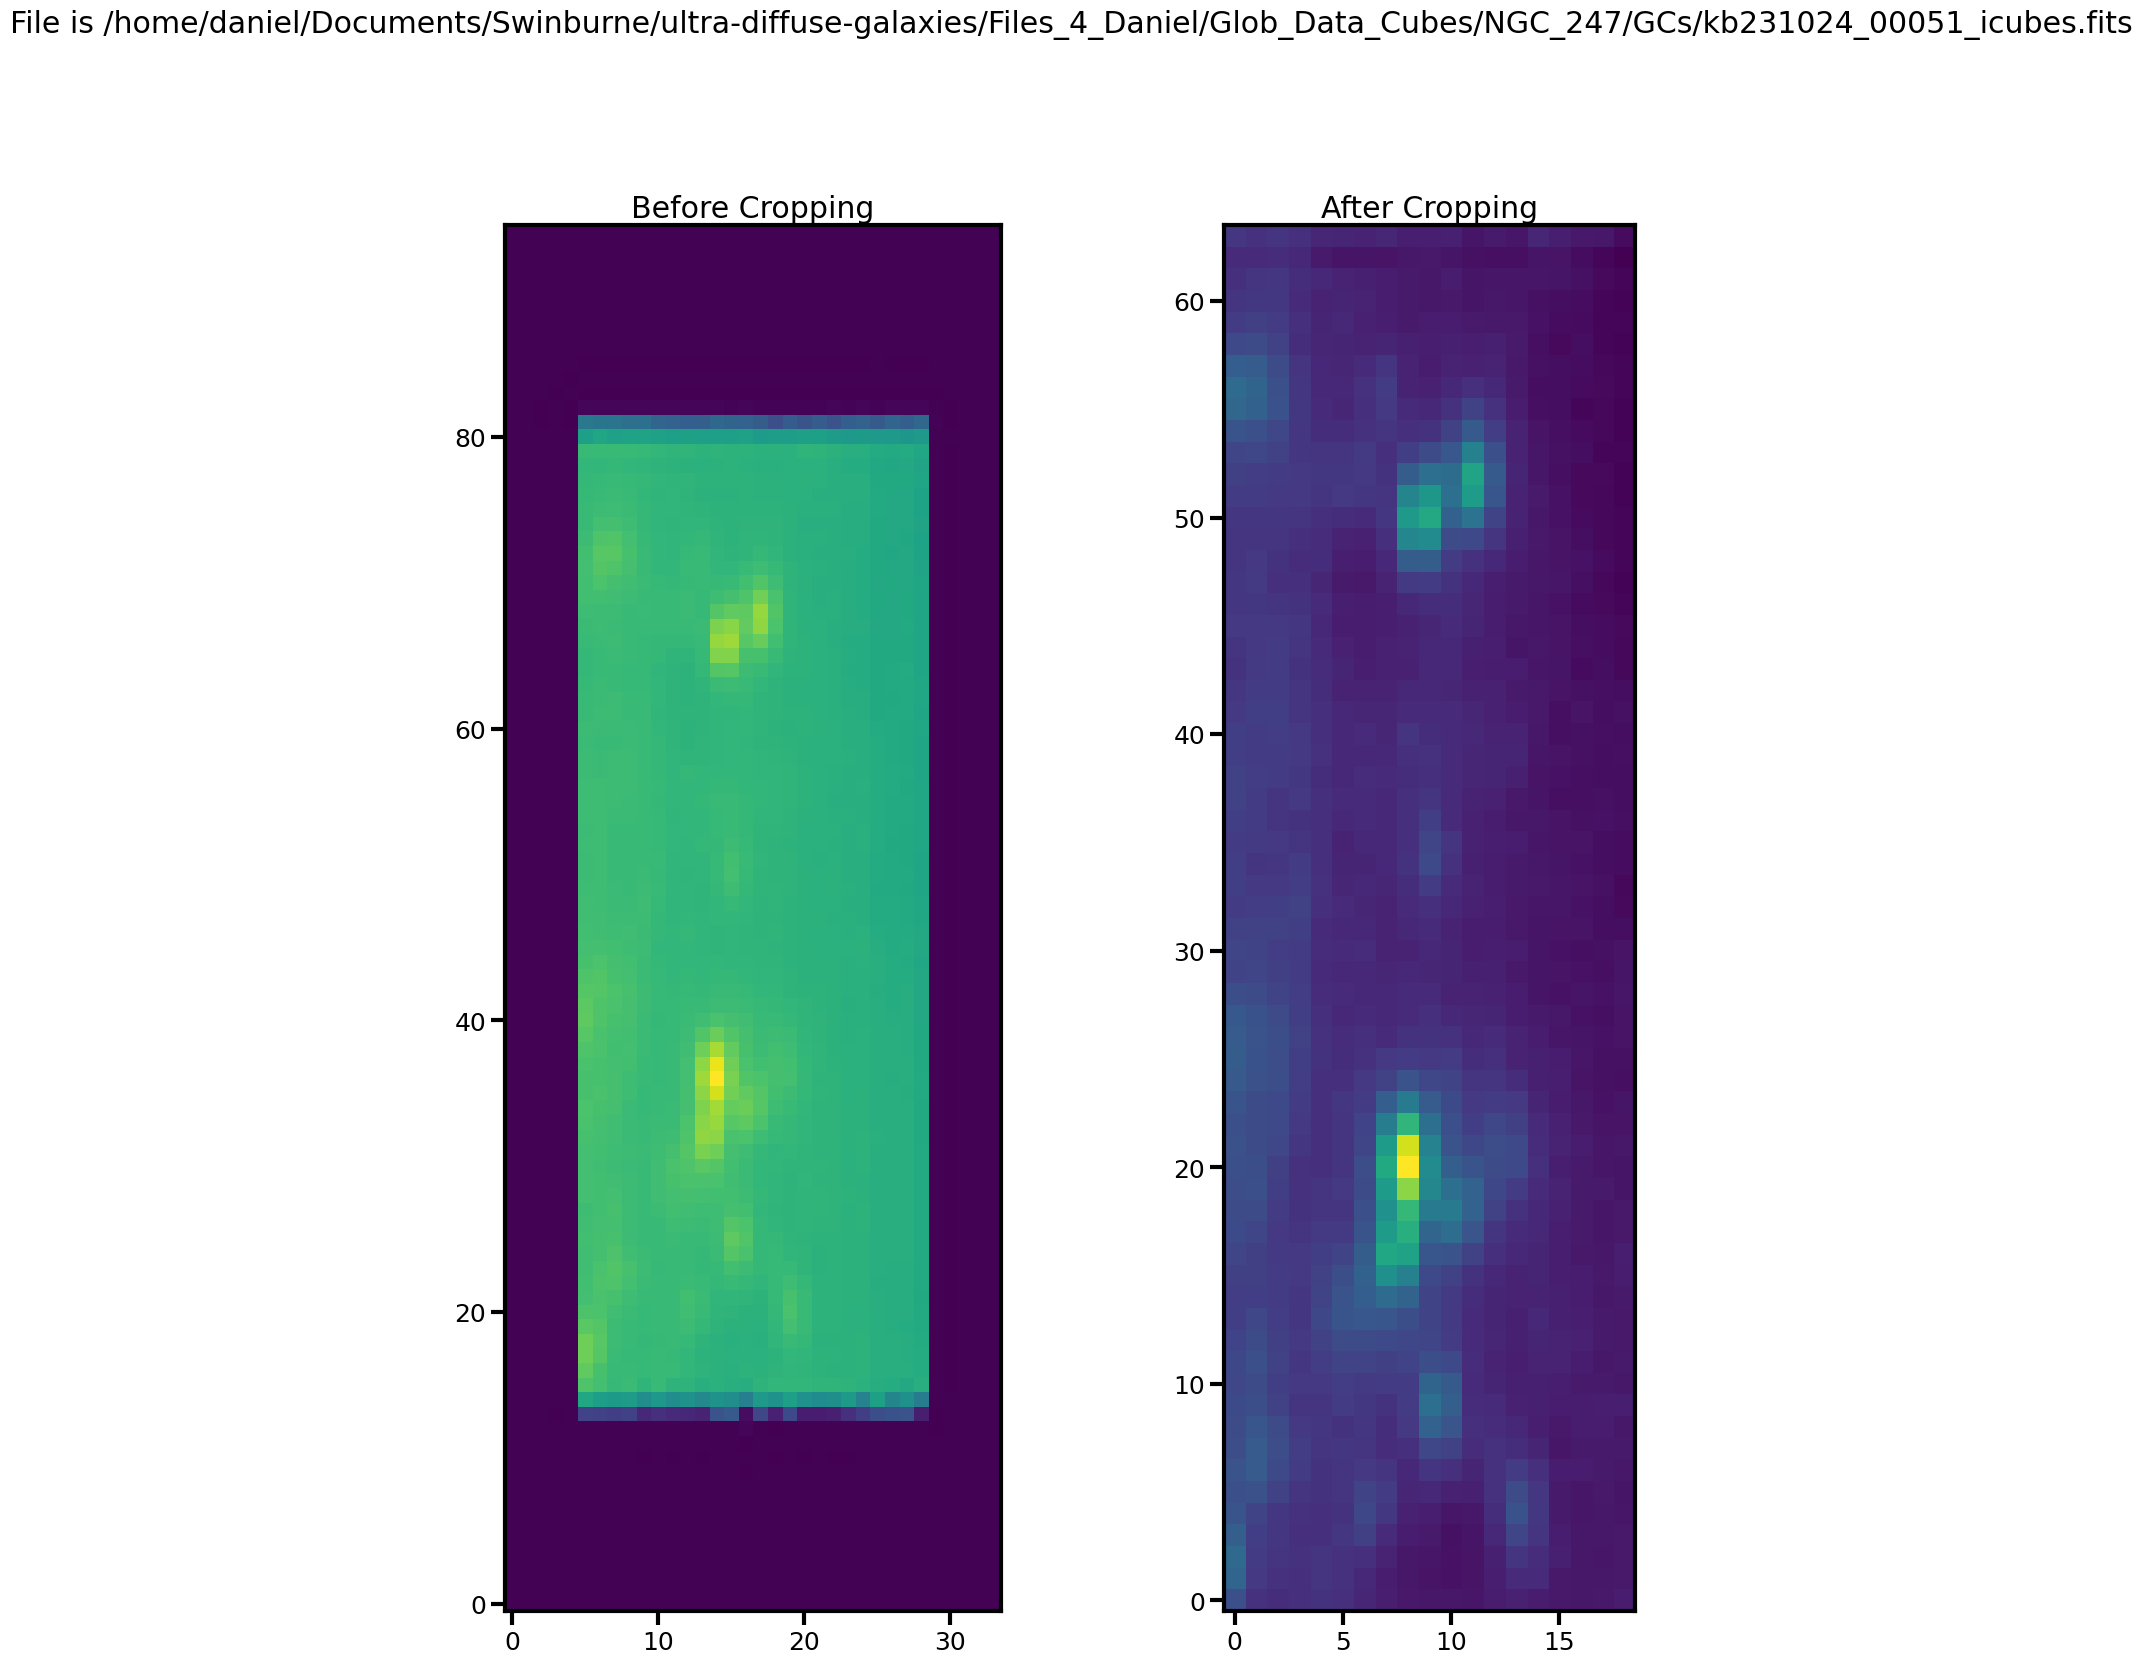

Files Written out


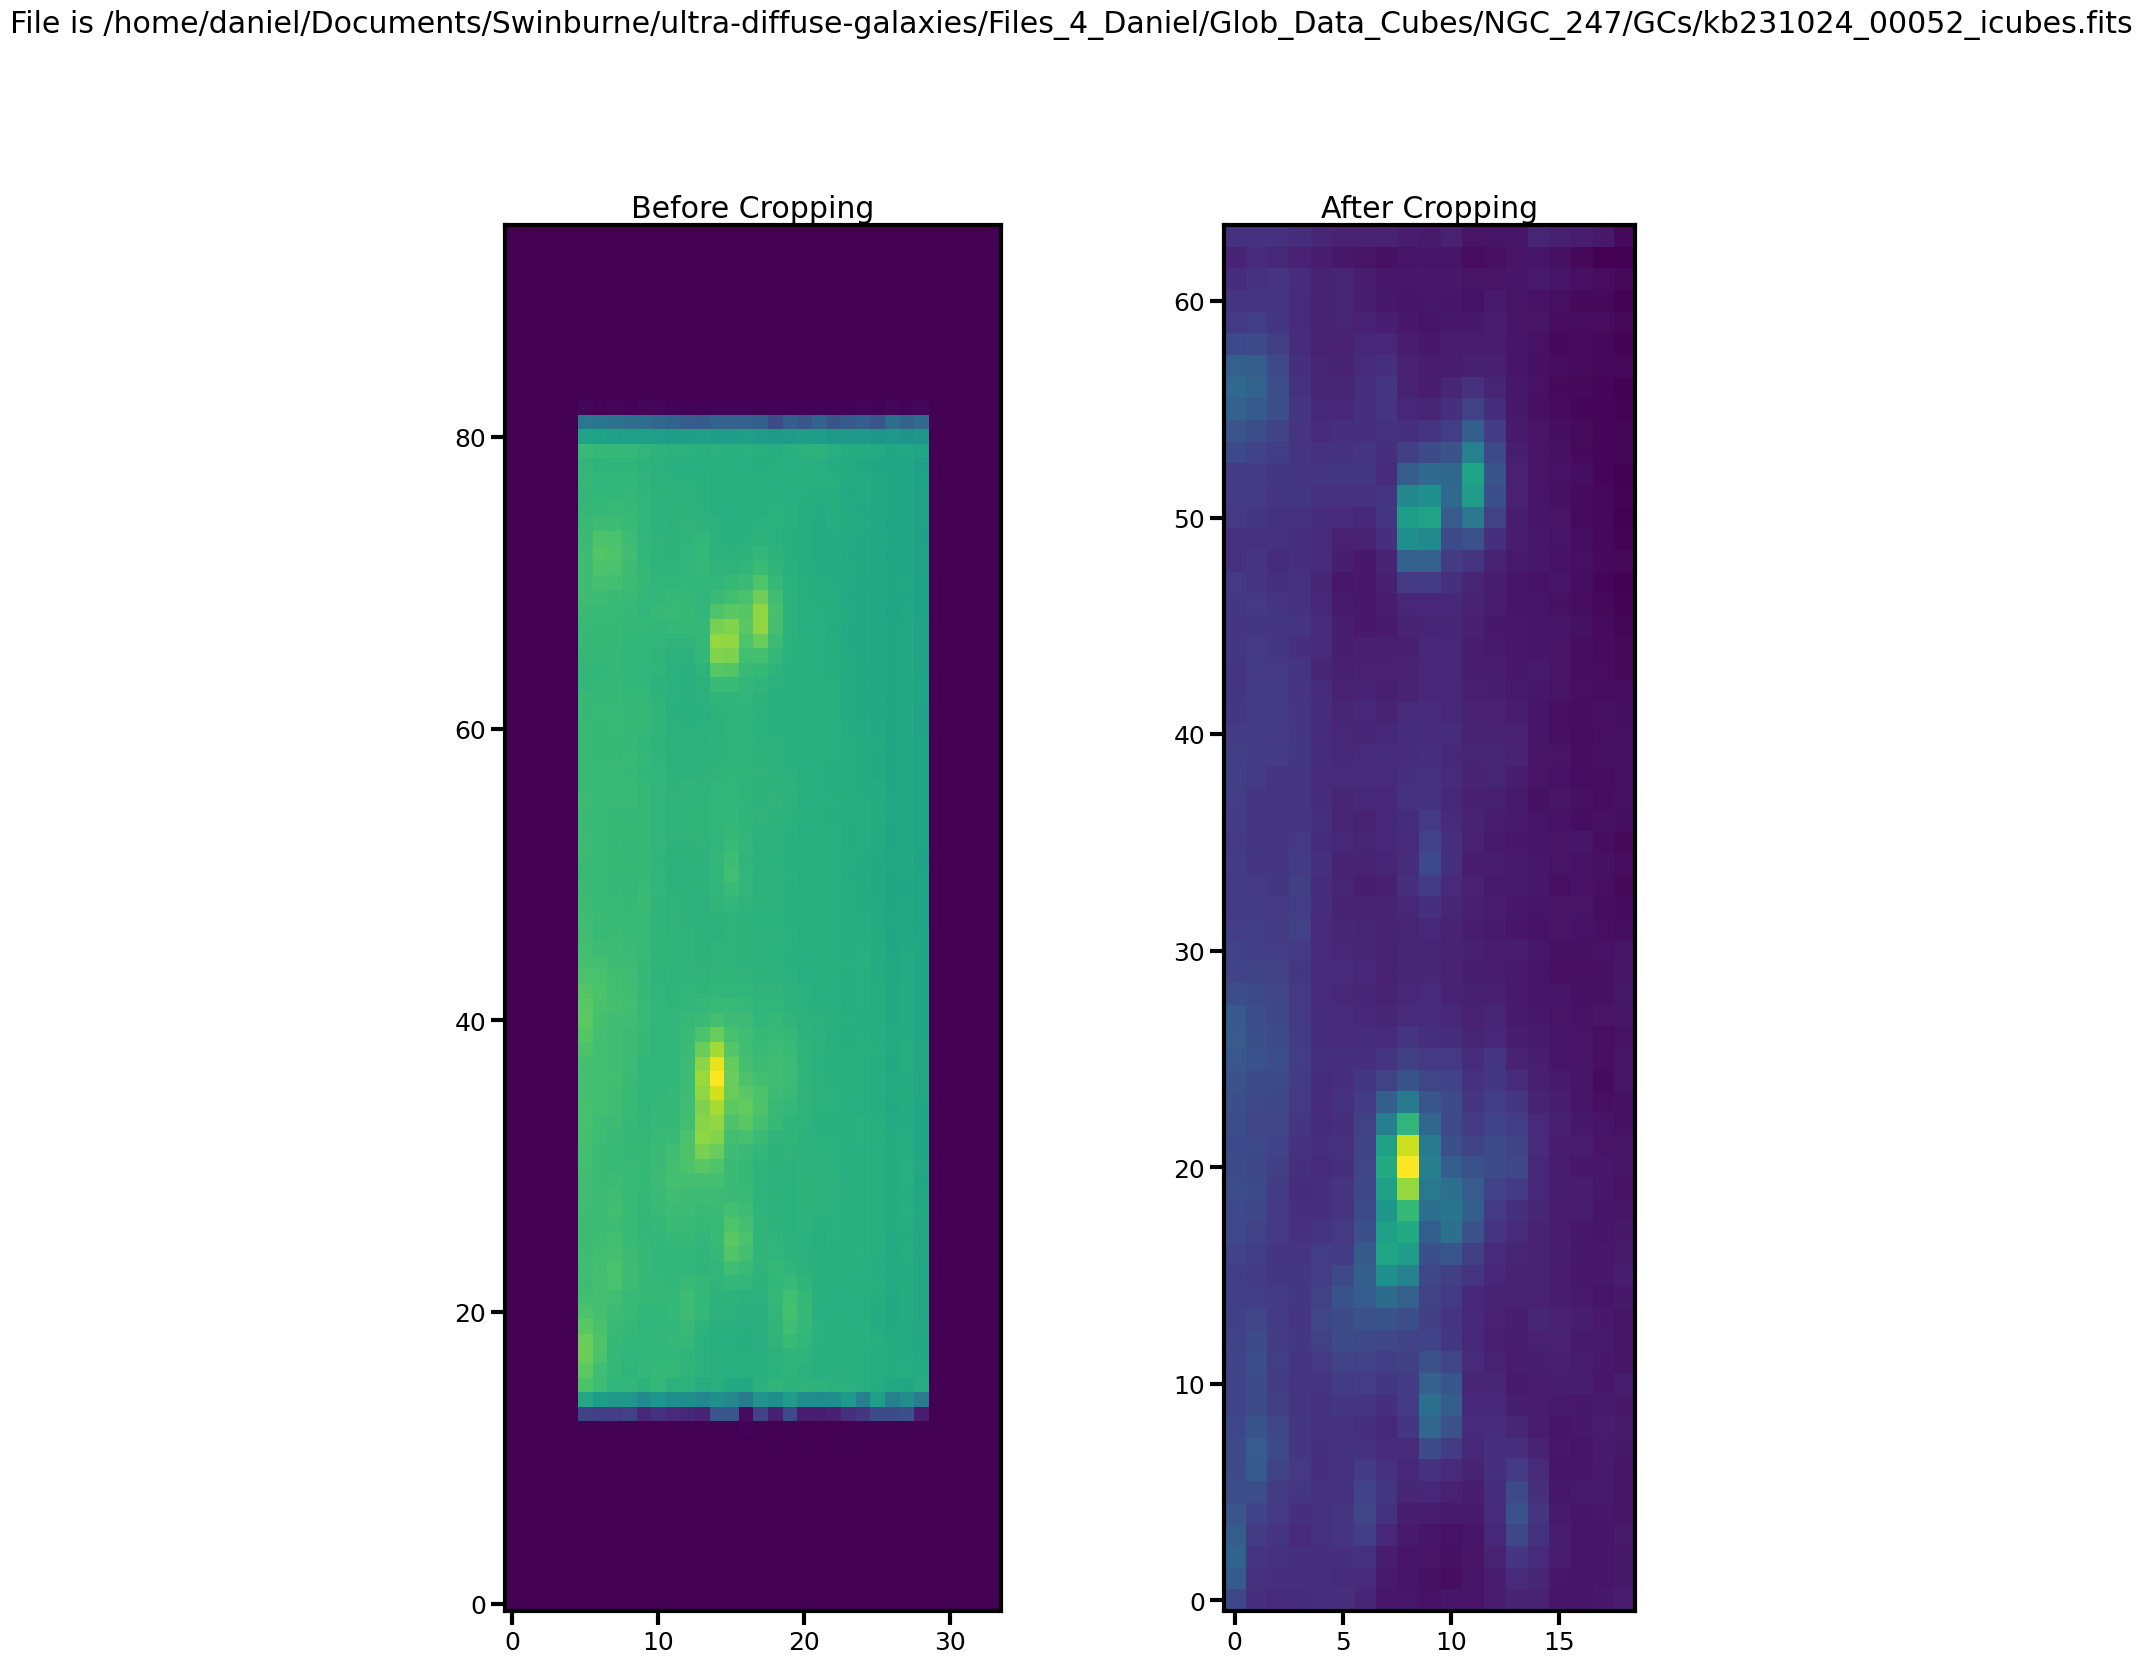

Files Written out
Code Competed Successfully in, 82.24 seconds


In [4]:
s1_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/NGC_247/GCs/' # path to directory containing spectra
s1_file_keyword = '*kb*icubes*' # keyword to find files in directory

x_low = 7 # lowest and highest xvalue of the spaxel to be INCLUDED in the rectangle
x_high = 25
y_low = 17 # lowest and highest yvalue of the spaxel to be INCLUDED in the rectangle
y_high = 80

cut_cube(s1_file_directory, s1_file_keyword, x_low, x_high, y_low, y_high)

### 2) Extract spectra

Get spectra of the desired objects

1) Open each cut file in QFitsView and place your desired aperture and annulus. 

2) Right click the object and choosing "Copy spectrum to new buffer" 

3) Then right click again and choose "Save spectrum as fits"

4) Repeat for each object.

5) Repeat for each file

### 3) Barycentric correction

1) Input file and keyword to select extracted spectra

2) Set to "manual" and choose your own correction \
OR \
set to "auto" and get the automatic correction

In [5]:
s2_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results_GC/NGC_247/GCs/obj1/' # path to directory containing spectra
s2_file_keyword = '[0-9]*.fits' # keyword to find files in directory
corrections = 'auto' # 'manual' or else 'automatic'

# ------------------------------

if corrections == 'manual':
    bary_corr = np.array([0,0,0]) # Manual barycentric correction in km/s. One number for each file!
    # INPUT MANUAL ABOVE ^^^^^^
elif corrections == 'auto':
    bary_corr = barycentric_correction(s2_file_directory, s2_file_keyword)
    bary_corr = np.array(bary_corr)
    if np.all(bary_corr > 0):
        bary_corr = -bary_corr
        print('ensured bary_corr is negative')
    
print(f'Barycentric correction: {bary_corr} km/s')
print(f'Correction Deltas: {np.diff(bary_corr)} km/s')
plt.close()

The Barycentric correction is: 15.475628058216078 km/s
The Barycentric correction is: 15.527670849695077 km/s
The Barycentric correction is: 15.578652874996106 km/s
ensured bary_corr is negative
Barycentric correction: [-15.47562806 -15.52767085 -15.57865287] km/s
Correction Deltas: [-0.05204279 -0.05098203] km/s


### 4) Spectra Stacking

Stacks all files from a single object together. If multiple objects exist, you must rerun step 3) for each object

list of files: ['/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results_GC/NGC_247/GCs/obj1/50.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results_GC/NGC_247/GCs/obj1/51.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results_GC/NGC_247/GCs/obj1/52.fits']
[3632. 3633. 3634. ... 5622. 5623. 5624.]


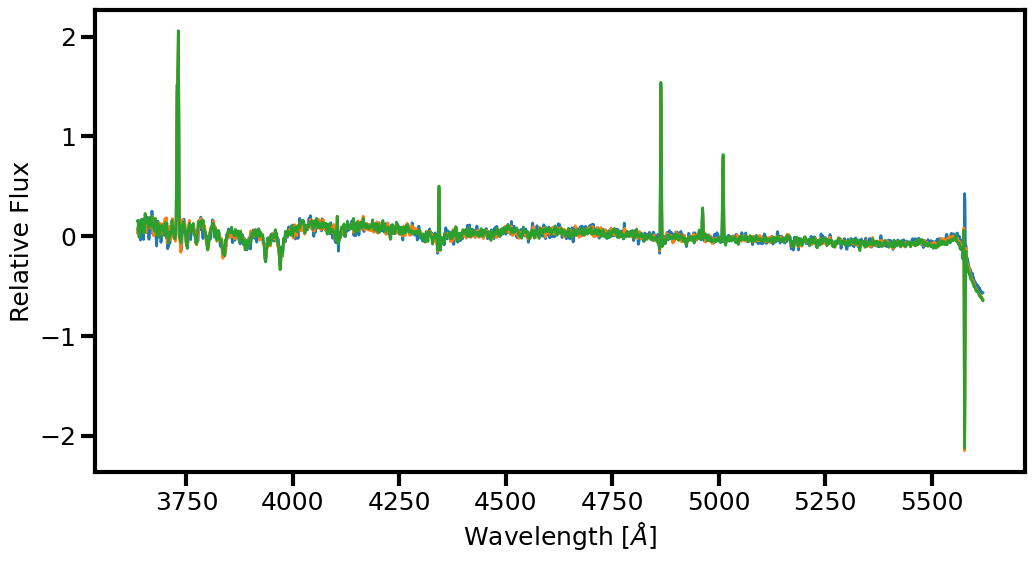

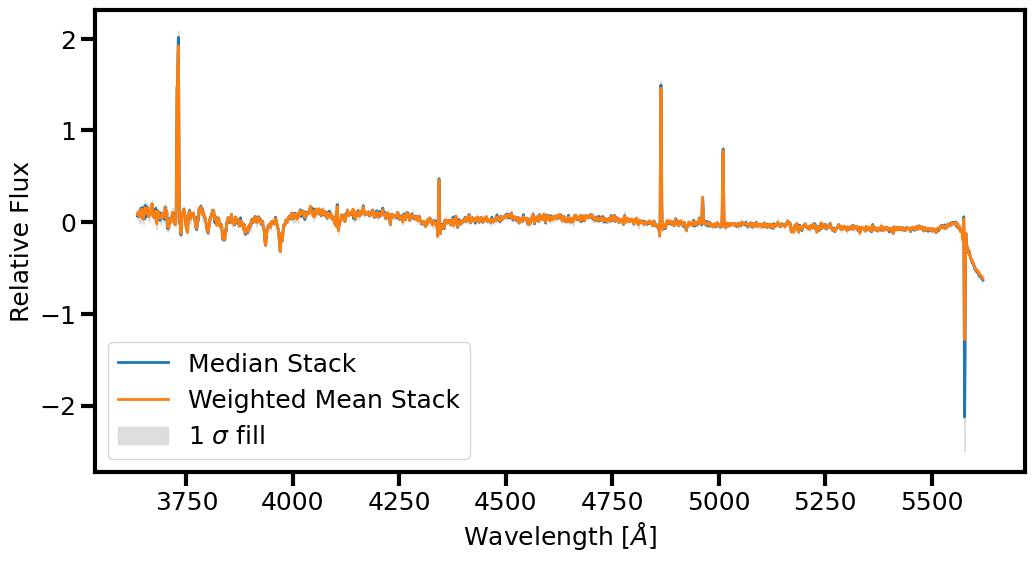

OSError: File '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results_GC/NGC_247/GCs/obj1/mean.fits' already exists.

In [6]:
overwrite = False # if True, will overwrite any existing files. Proceed with caution.

spectra_stack(s2_file_directory, s2_file_keyword, bary_corr, overwrite)